In [1]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import metrics
import numpy as np

In [3]:
Diamonds.head()

carat        cut color clarity  depth  table  price     x     y     z
23574   1.32      Ideal     G     VS1   61.7   56.0  11584  7.04  7.07  4.35
49022   0.57      Ideal     H    VVS1   60.9   56.0   2052  5.38  5.36  3.27
13161   1.01  Very Good     D     SI1   61.6   60.0   5443  6.43  6.47  3.97
20039   0.30    Premium     H     SI1   59.3   59.0    421  4.36  4.38  2.59
28584   0.30    Premium     G     VS2   61.9   58.0    675  4.33  4.30  2.67

In [4]:
Diamonds.price.value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
14615      1
13201      1
14421      1
12089      1
12430      1
Name: price, Length: 11602, dtype: int64

In [5]:
Diamonds.info()    #No null values. Need to recode cut, color and clarity. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 23574 to 19542
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [6]:
Diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [37]:
def cut_recode (series): 
    if series == "Ideal":
        return 0
    if series == "Premium":
        return 1
    if series == "Very Good":
        return 2
    if series == "Good":
        return 3
    if series == "Fair":
        return 4
    
Diamonds['cutR']= Diamonds['cut'].apply(cut_recode)

In [38]:
Diamonds.head()

carat        cut color clarity  depth  table  price     x     y     z  \
23574      1      Ideal     G     VS1   61.7   56.0  11584  7.04  7.07  4.35   
49022      0      Ideal     H    VVS1   60.9   56.0   2052  5.38  5.36  3.27   
13161      1  Very Good     D     SI1   61.6   60.0   5443  6.43  6.47  3.97   
20039      0    Premium     H     SI1   59.3   59.0    421  4.36  4.38  2.59   
28584      0    Premium     G     VS2   61.9   58.0    675  4.33  4.30  2.67   

      cutR  colorR  clarityR  
23574    0       1         4  
49022    0       4         6  
13161    2       5         1  
20039    1       4         1  
28584    1       1         2

In [9]:
Diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [39]:
def color_recode (series):
    if series == "G":
        return 0
    if series == "E":
        return 1
    if series == "F":
        return 2
    if series == "H":
        return 3
    if series == "D":
        return 4
    if series == "I":
        return 5
    if series == "J":
        return 6
    
Diamonds['colorR']= Diamonds['color'].apply(color_recode)

In [40]:
Diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [41]:
def clarity_recode (series):
    if series == "SI1":
        return 0
    if series == "VS2":
        return 1
    if series == "SI2":
        return 2
    if series == "VS1":
        return 3
    if series == "VVS2":
        return 4
    if series == "VVS1":
        return 5
    if series == "IF":
        return 6
    if series == "I1":
        return 7
    
Diamonds['clarityR']= Diamonds['clarity'].apply(clarity_recode)

In [42]:
Diamonds.head()  # Nice, but now they need to be integers. 

carat        cut color clarity  depth  table  price     x     y     z  \
23574      1      Ideal     G     VS1   61.7   56.0  11584  7.04  7.07  4.35   
49022      0      Ideal     H    VVS1   60.9   56.0   2052  5.38  5.36  3.27   
13161      1  Very Good     D     SI1   61.6   60.0   5443  6.43  6.47  3.97   
20039      0    Premium     H     SI1   59.3   59.0    421  4.36  4.38  2.59   
28584      0    Premium     G     VS2   61.9   58.0    675  4.33  4.30  2.67   

      cutR colorR clarityR  
23574    0      0        3  
49022    0      3        5  
13161    2      4        0  
20039    1      3        0  
28584    1      0        1

In [43]:
Diamonds['cutR']= Diamonds['cutR'].astype(int)
Diamonds['colorR']= Diamonds['colorR'].astype(int)
Diamonds['clarityR']= Diamonds['clarityR'].astype(int)
Diamonds['carat']= Diamonds['carat'].astype(int)

In [44]:
Diamonds.info()  #All set as integers. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 23574 to 19542
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   carat     53940 non-null  int64   
 1   cut       53940 non-null  category
 2   color     53940 non-null  category
 3   clarity   53940 non-null  category
 4   depth     53940 non-null  float64 
 5   table     53940 non-null  float64 
 6   price     53940 non-null  int64   
 7   x         53940 non-null  float64 
 8   y         53940 non-null  float64 
 9   z         53940 non-null  float64 
 10  cutR      53940 non-null  int64   
 11  colorR    53940 non-null  int64   
 12  clarityR  53940 non-null  int64   
dtypes: category(3), float64(5), int64(5)
memory usage: 4.7 MB


In [16]:
Diamonds.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           0
y           0
z           0
cutR        0
colorR      0
clarityR    0
dtype: int64

## Define x and y variables. 

In [45]:
x = Diamonds[['carat', 'cutR', 'colorR', 'clarityR' ]]

In [46]:
y = Diamonds['price']

## Train/Test Split Data

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= .4, random_state=101)

In [48]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

#in the x_train dataset, there are 32364 rows and 4 columns and in the x_test dataset, there are 21567 rows and 4 columns

(32364, 4) (32364,)
(21576, 4) (21576,)


## Create the Model

In [49]:
lm =LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

## Analyze the Predictions

In [50]:
predictions = lm.predict(x_test)
predictions

array([7951.76030078, 1617.13803937, 7534.39354601, ..., 7383.5112151 ,
       1890.44996076, 1799.34598697])

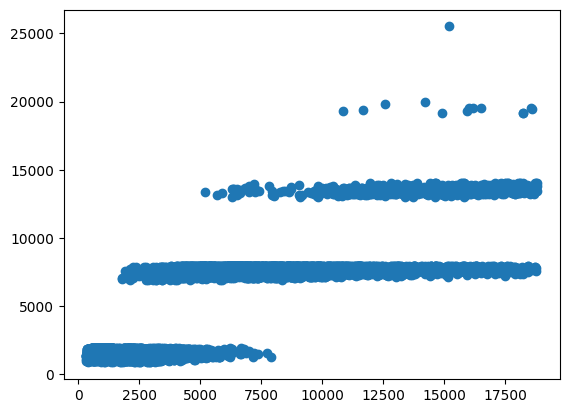

In [51]:
plt.scatter(y_test, predictions)  # The data comes in steps. 

## Print an Accuracy Score

In [52]:
print("Score:", lm.score(x_test, y_test))

Score: 0.732965331476845


### This model is 73% accurate based on the score. 

## Final check, examining the error rates for the Model Fit

In [53]:
metrics.mean_absolute_error(y_test, predictions)   

# This is super high! Seems like this is realated to the steps in the plot


1489.237685481356

In [54]:
metrics.mean_squared_error(y_test, predictions)  # Obviously higher

4217171.310056336

In [55]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))  # Still high

2053.5752506437

## k-Fold Cross Validation, because I feel like there is more I should do...

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean
from numpy import std

In [58]:
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [59]:
scores = cross_val_score(lm, x, y, scoring = 'neg_mean_absolute_error',
                        cv=cv, n_jobs = -1)

In [60]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))   
### Still seems huge, and like this is maybe not what I want??

Accuracy: -1497.862 (14.110)


In [62]:
kfold = KFold(n_splits = 10, shuffle =True, random_state= 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))   

train: [    0     1     2 ... 53937 53938 53939], test: [   10    28    44 ... 53889 53902 53913]
train: [    0     1     2 ... 53937 53938 53939], test: [   12    23    30 ... 53905 53906 53911]
train: [    0     1     4 ... 53937 53938 53939], test: [    2     3    11 ... 53932 53934 53935]
train: [    0     1     2 ... 53936 53938 53939], test: [    8    19    21 ... 53890 53916 53937]
train: [    0     1     2 ... 53937 53938 53939], test: [   26    35    36 ... 53878 53922 53933]
train: [    1     2     3 ... 53937 53938 53939], test: [    0    29    31 ... 53910 53915 53936]
train: [    0     1     2 ... 53937 53938 53939], test: [    4     5     6 ... 53925 53927 53931]
train: [    0     2     3 ... 53937 53938 53939], test: [    1    50    60 ... 53914 53921 53930]
train: [    0     1     2 ... 53936 53937 53938], test: [    9    39    48 ... 53926 53928 53939]
train: [    0     1     2 ... 53936 53937 53939], test: [   14    15    18 ... 53923 53929 53938]


In [64]:
print(cross_val_score(lm, x, y, cv = 10))

[0.73840694 0.7246482  0.73720977 0.71449035 0.72030231 0.74131467
 0.72680006 0.73553382 0.73823804 0.73012683]


In [ ]:
## It looks like all trained models were accurate 70-something percent of the time. 
## This model has been throroughly tested and I feel secure in saying I have created a rigorous model that has
### stood up to some serious testing. 